In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from tensorflow.keras.layers.experimental import preprocessing

In [2]:
#import tensorflow as tf
#from tensorflow.keras import layers

# Load Data

In [3]:
housing_price = pd.read_csv('housing.csv.zip')
housing_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing_price.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing_price.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Clean Data

In [6]:
housing_price.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [7]:
housing_price.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
# Drop total_bedrooms, because the correlation is only 0.049686.
cleaned_housing_price = housing_price.drop('total_bedrooms', axis = 1)
cleaned_housing_price.head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
# Replace ocean_proximity by Numbers
housing_price["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [10]:
cleaned_housing_price = cleaned_housing_price.replace({'ISLAND':0, 'NEAR BAY':1, 'NEAR OCEAN':2, '<1H OCEAN':3, 'INLAND':4})
cleaned_housing_price.head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,322.0,126.0,8.3252,452600.0,1
1,-122.22,37.86,21.0,7099.0,2401.0,1138.0,8.3014,358500.0,1
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0,1
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0,1
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0,1


In [11]:
cleaned_housing_price['ocean_proximity'].value_counts()

3    9136
4    6551
2    2658
1    2290
0       5
Name: ocean_proximity, dtype: int64

# Inspect Data

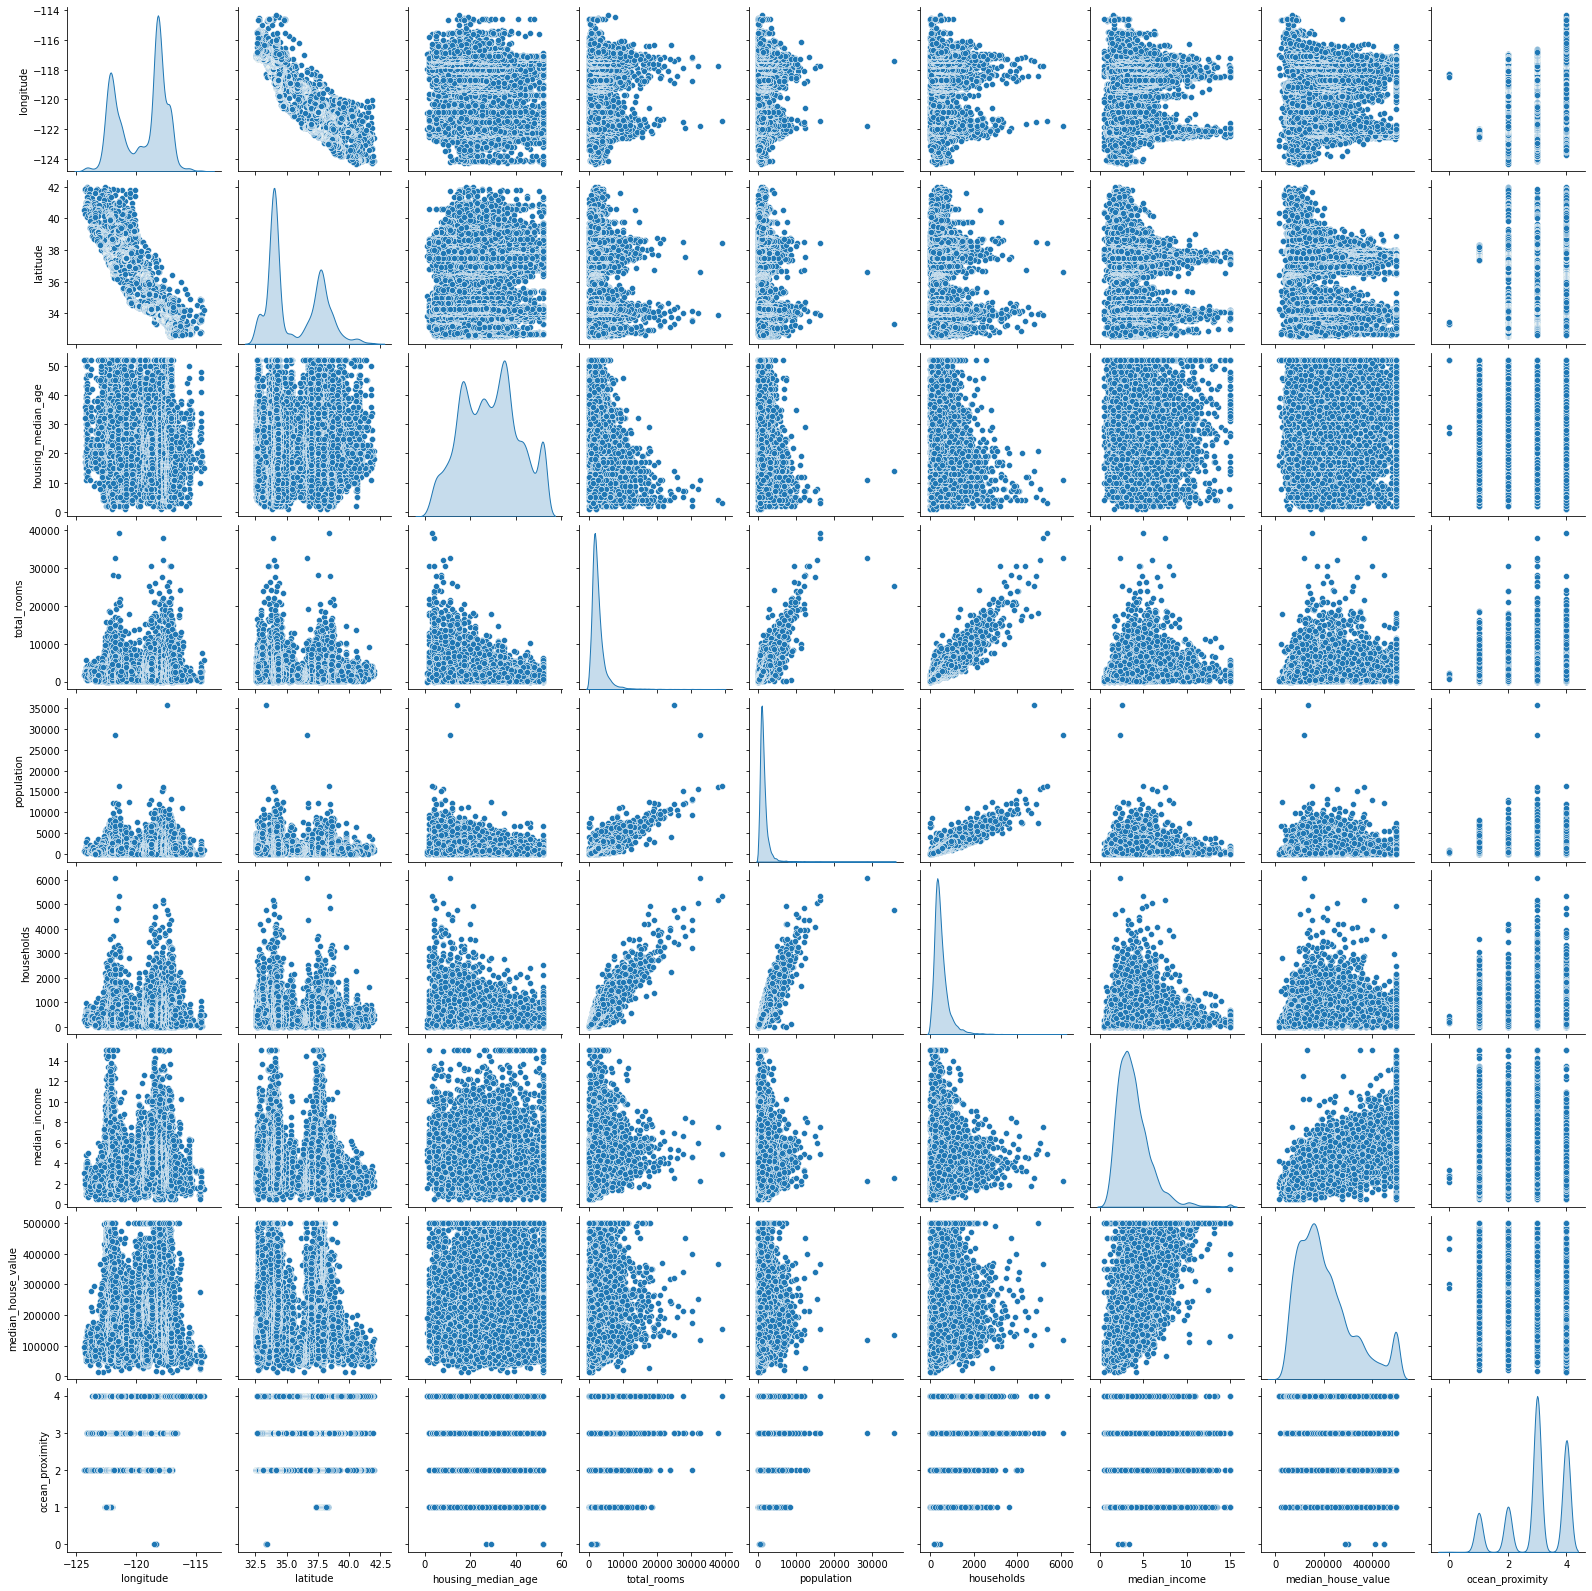

In [12]:
sns.pairplot(cleaned_housing_price[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']], diag_kind='kde')

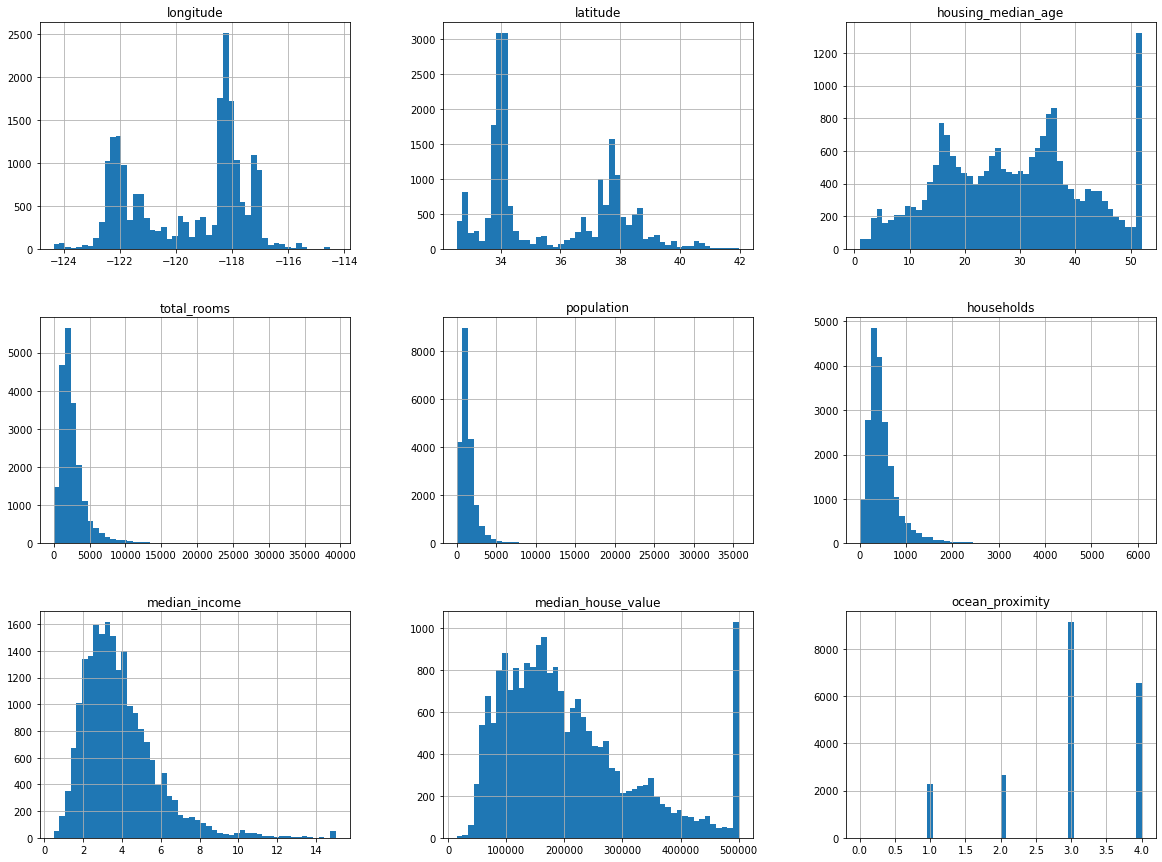

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
cleaned_housing_price.hist(bins=50, figsize=(20,15))
plt.show()

In [14]:
cleaned_housing_price.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000
ocean_proximity,20640.0,2.965988,0.943948,0.0000,3.0000,3.0000,4.00000,4.0000


# Build Model

In [15]:
cleaned_housing_price.corr()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity
longitude,1.000000,-0.924664,-0.108197,0.044568,0.099773,0.055310,-0.015176,-0.045967,0.271730
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.108785,-0.071035,-0.079809,-0.144160,-0.007695
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.296244,-0.302916,-0.119034,0.105623,-0.295012
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.857126,0.918484,0.198050,0.134153,0.031586
population,0.099773,-0.108785,-0.296244,0.857126,1.000000,0.907222,0.004834,-0.024650,0.039415
households,0.055310,-0.071035,-0.302916,0.918484,0.907222,1.000000,0.013033,0.065843,-0.012873
median_income,-0.015176,-0.079809,-0.119034,0.198050,0.004834,0.013033,1.000000,0.688075,-0.163755
median_house_value,-0.045967,-0.144160,0.105623,0.134153,-0.024650,0.065843,0.688075,1.000000,-0.397251
ocean_proximity,0.271730,-0.007695,-0.295012,0.031586,0.039415,-0.012873,-0.163755,-0.397251,1.000000


## Fitting Linear Regression using statsmodel

In [16]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [17]:
# Only use relevant columns: latitude, housing_median_age, total_rooms, median_income, ocean_proximity
m = ols('median_house_value ~ latitude + housing_median_age + total_rooms + median_income + ocean_proximity', cleaned_housing_price).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     5673.
Date:                Wed, 05 May 2021   Prob (F-statistic):               0.00
Time:                        23:41:05   Log-Likelihood:            -2.6094e+05
No. Observations:               20640   AIC:                         5.219e+05
Df Residuals:                   20634   BIC:                         5.219e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           2.885e+05   9433

## Fitting Linear Regression using sklearn

In [18]:
from sklearn.linear_model import LinearRegression
X = cleaned_housing_price.drop(['median_house_value', 'longitude', 'population', 'households'], axis=1)

# This creates a LinearRegression object
lm = LinearRegression()
lm.fit(X, cleaned_housing_price.median_house_value)

LinearRegression()

In [19]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))
print('Matches the statsmodel')

Estimated intercept coefficient: 288522.8770379376
Matches the statsmodel


In [20]:
# The coefficientspd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,latitude,-5089.968718
1,housing_median_age,1176.758851
2,total_rooms,3.069015
3,median_income,39013.154719
4,ocean_proximity,-31389.216774


In [21]:
predicted = lm.predict(X)
pd.DataFrame({'predicted': predicted, 'price': cleaned_housing_price.median_house_value})[['predicted', 'price']]

,predicted,price
0,440065.806876,452600.0
1,434790.119449,358500.0
2,413306.118405,352100.0
3,349734.862876,341300.0
4,280715.487401,342200.0
...,...,...
20635,57415.151276,78100.0
20636,85032.741941,77100.0
20637,55513.366359,92300.0
20638,62003.932831,84700.0


Text(0, 0.5, 'Frequency')

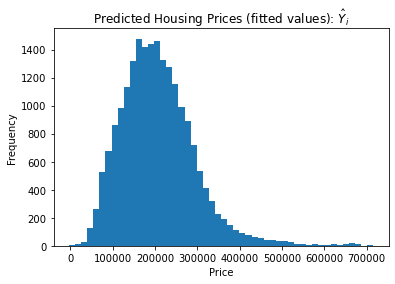

In [22]:
plt.hist(predicted, bins = 50)
plt.title('Predicted Housing Prices (fitted values): $\hat{Y}_i$')
plt.xlabel('Price')
plt.ylabel('Frequency')

C:\Users\chuiw1\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

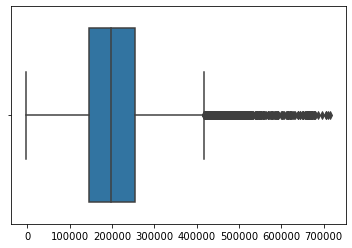

In [23]:
sns.boxplot(predicted)

Text(0.5, 1.0, 'Relationship between predictions and housing price')

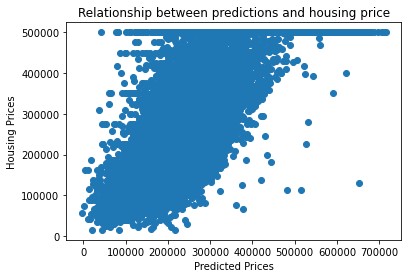

In [24]:
plt.scatter(predicted, cleaned_housing_price.median_house_value)
plt.xlabel("Predicted Prices")
plt.ylabel("Housing Prices")
plt.title("Relationship between predictions and housing price")

### Evaluate Model: the Coefficient of Determination ( 𝑅2 ) and F-Statistic

In [25]:
from sklearn.metrics import r2_score
r2score = r2_score(cleaned_housing_price.median_house_value, lm.predict(X))
print("The coefficient of determination (R^2) is " + str(r2score) + " which is very close to the statsmodel (0.579)")

The coefficient of determination (R^2) is 0.5788700138901641 which is very close to the statsmodel (0.579)


In [26]:
N = 20640
K = 5
fstat = (r2score/(1-r2score))*((N-K-1)/K)
print("The f-statistic is " + str(fstat) + ", which is very close to the statsmodel (5673)")

The f-statistic is 5672.5496927660715, which is very close to the statsmodel (5673)


# Fine-tune Model

In [27]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

N = 20640
K = 5

def display_statistics(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    print("rmse: " + str(rmse))
    
    r2score = r2_score(actual, predicted)
    print("The coefficient of determination (R^2): " + str(r2score))
    
    fstat = (r2score/(1-r2score))*((N-K-1)/K)
    print("The f-statistic: " + str(fstat))

def display_scores(model, data, actual):
    scores = cross_val_score(model, data, actual,
                         scoring="neg_mean_squared_error", cv=10)
    rmse_scores = np.sqrt(-scores)
   
    print("Scores:", rmse_scores)
    print("Mean:", rmse_scores.mean())
    print("Standard deviation:", rmse_scores.std())    

## Linear Regression

In [28]:
display_statistics(cleaned_housing_price.median_house_value, lm.predict(X))
print()
display_scores(lm, X, cleaned_housing_price.median_house_value)

rmse: 74883.62700737722
The coefficient of determination (R^2): 0.5788700138901641
The f-statistic: 5672.5496927660715

Scores: [97122.72256311 66111.95664509 99845.57630707 62152.50797046
 88174.3445149  70376.78507963 60820.23276587 89544.03973963
 89317.60654721 57696.92520319]
Mean: 78116.26973361624
Standard deviation: 15380.455540263507


## Decision Tree Regression

In [29]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X, cleaned_housing_price.median_house_value)

display_statistics(cleaned_housing_price.median_house_value, tree_model.predict(X))
print()
display_scores(tree_model, X, cleaned_housing_price.median_house_value)

rmse: 0.0
The coefficient of determination (R^2): 1.0
The f-statistic: inf



<ipython-input-27-2c333ad2bf0b>:15: RuntimeWarning: divide by zero encountered in double_scalars
  fstat = (r2score/(1-r2score))*((N-K-1)/K)


Scores: [132654.56043043  81125.48708138 111957.5815908  116484.41926227
 103902.14534341  97638.49079761  82051.81395952 144986.40417758
 106951.10866037  75233.83740589]
Mean: 105298.58487092417
Standard deviation: 21412.46249874904


## RandomForestRegressor

In [30]:
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X, cleaned_housing_price.median_house_value)

display_statistics(cleaned_housing_price.median_house_value, forest_model.predict(X))
print()
display_scores(forest_model, X, cleaned_housing_price.median_house_value)

rmse: 22966.279606795208
The coefficient of determination (R^2): 0.9603882783140004
The f-statistic: 100054.48332600555

Scores: [114630.25745274  55514.31023768  89723.28315451  89797.13887181
  86490.18891391  74118.98050462  63902.36888897 105670.78135069
  81937.89173565  55246.72500823]
Mean: 81703.19261187993
Standard deviation: 18898.764460161747


## SVR

In [31]:
from sklearn.svm import SVR

svm_model = SVR(kernel="linear")
svm_model.fit(X, cleaned_housing_price.median_house_value)

display_statistics(cleaned_housing_price.median_house_value, svm_model.predict(X))
print()
display_scores(svm_model, X, cleaned_housing_price.median_house_value)

rmse: 93980.3725961916
The coefficient of determination (R^2): 0.3366896892459592
The f-statistic: 2094.722465569272

Scores: [ 72652.81626624  86203.7672847  114217.28202261  68767.51186771
 120673.01042884  98424.39268926  75789.50667374 108482.52336338
 139308.51898625  72954.71563345]
Mean: 95747.40452161884
Standard deviation: 23020.691551253698
